In [25]:
from utils.bp_processing import bp_tokenize
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import torch
from attention.attention_model import StructuredSelfAttention
from torch.autograd import Variable
import pandas as pd
import torch.utils.data as data_utils
 

In [43]:
MAX_LEN = 50
VOCAB_SIZE = 260
EMB_DIM = 10

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [45]:
dataset = pd.read_csv('../../data/train.csv', encoding='utf-16')


In [46]:
x_padded = bp_tokenize(dataset.comment)
y = dataset.label

100%|████████████████████████████████████████████████████████████████████████| 42000/42000 [00:00<00:00, 176553.42it/s]


In [47]:
x_padded = pad_sequences(x_padded, maxlen=MAX_LEN)

In [48]:

model = torch.load('../model/self_attention_bp_mixed_10.pt')

In [49]:
x_test_var.shape

torch.Size([42000, 30])

In [50]:
model.batch_size = x_padded.shape[0]
model.hidden_state = model.init_hidden()
x_test_var = Variable(torch.from_numpy(x_padded).type(torch.LongTensor))
y_test_pred,_ = model(x_test_var)
y_preds = torch.round(y_test_pred.type(torch.DoubleTensor).squeeze(1))

C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
E:\data_campus\korea-3\src\NLP\attention\attention_model.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  soft_max_2d = F.softmax(input_2d)
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [156]:
y_preds.data.numpy().sum() /len(y_preds) # 전체 데이터  유해 비율

0.13602380952380952

In [53]:
dataset.shape

(42000, 4)

In [62]:
dataset['pred'] = y_preds.data.numpy()

In [69]:
idgroup = dataset.groupby('url_id')

In [159]:
fuck_per = idgroup.pred.aggregate('sum') / idgroup.pred.count()

In [160]:
fuck_per.mean()

0.16480850438330516

In [96]:
a = fuck_per.values

In [107]:
from matplotlib import pyplot as plt

In [112]:
import seaborn as sns

[Text(0, 0.5, 'bj count'), Text(0.5, 0, 'bad_chat per all_chat')]

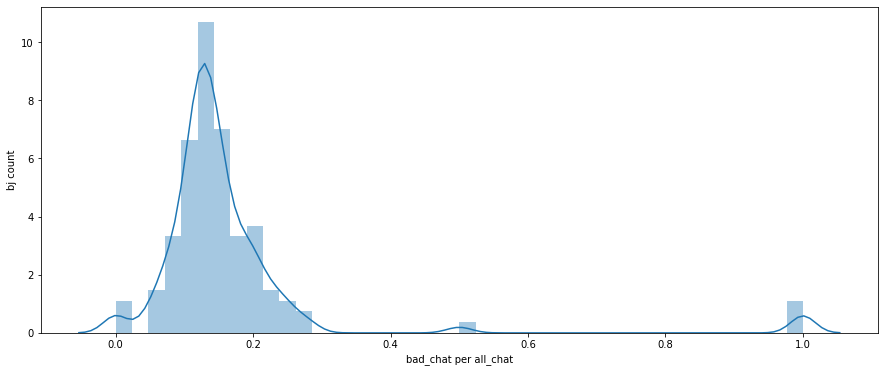

In [162]:
fig = plt.figure(figsize=(15,6))

ax = sns.distplot(a)
ax.set(xlabel='bad_chat per all_chat', ylabel='bj count')

In [163]:
fig.savefig('./bj별 유해도 분포')

In [136]:
np.percentile(a, 80) , np.median(a), np.mean(a)

(0.18987468671679197, 0.13389904264577895, 0.16480850438330516)

In [157]:
a.mean()

0.16480850438330516

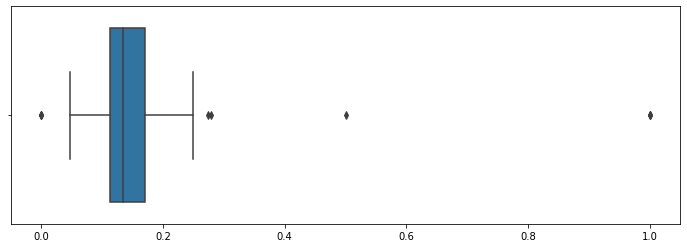

In [122]:
plt.figure(figsize=(12,4))
sns.boxplot(a)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d724bf28d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d724ba4eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d724ba4438>],
 'medians': [<matplotlib.lines.Line2D at 0x1d724d7a588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d724d7a8d0>],
 'means': []}

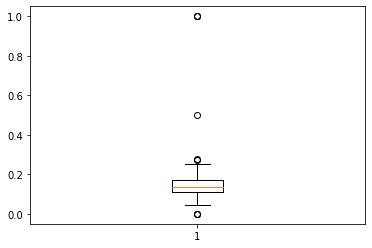

In [126]:
plt.boxplot(a,)